## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [50]:
! git clone https://www.github.com/DS3001/kmc

fatal: destination path 'kmc' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [51]:
### 1 ###
import pandas as pd
import numpy as np

# read and get the vars we care about
df = pd.read_csv("/content/kmc/data/airbnb_hw.csv", low_memory=False)
df = df.loc[: , ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating'] ]
df.head()

# cleaning price
df['Price'].unique()  # need to clear commas
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'])
df['Price'].unique()  # looks good

# cleaning beds
df['Beds'].unique()  # get rid of nan's --> changing to 0
df['Beds'] = df['Beds'].fillna(0)
df['Beds'].unique()  # looks good

# cleaning number of reviews
reviews = 'Number Of Reviews'
df[reviews].unique()  # looks good

# cleaning review scores rating
rating = 'Review Scores Rating'
df[rating].unique()  # some nulls, not sure what to do about them because can't fill with an actual score


array([ nan,  96., 100.,  94.,  90.,  98.,  93.,  91.,  97.,  95.,  99.,
        85.,  86.,  80.,  88.,  92.,  89.,  82.,  87.,  81.,  76.,  78.,
        83.,  66.,  84.,  72.,  79.,  60.,  40.,  62.,  74.,  77.,  50.,
        71.,  75.,  73.,  69.,  65.,  68.,  70.,  67.,  64.,  20.,  57.,
        58.,  43.,  63.,  55.,  47.,  53.,  49.,  30.])

In [52]:
### 2 ###
df = df.dropna()  # get rid of null values
df.head()

def maxmin(x):
  mu = ( x - min(x) ) / ( max(x) - min(x) )
  return mu

price_df = df
df = df.drop('Price', axis=1)
df = df.apply(maxmin)
df.head() # looks good



,Beds,Number Of Reviews,Review Scores Rating
4,0.1875,0.148438,0.950
5,0.0625,0.011719,1.000
6,0.0625,0.031250,1.000
7,0.0625,0.308594,0.925
8,0.1250,0.367188,0.875


In [53]:
### 3 ###
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, max_iter=50, random_state=0)
model = model.fit(df)
df['Clusters'] = model.labels_
df.head()
df.describe()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Beds,Number Of Reviews,Review Scores Rating,Clusters
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097187,0.060568,0.899915,1.414715
std,0.065330,0.094954,0.110630,1.372909
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,0.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


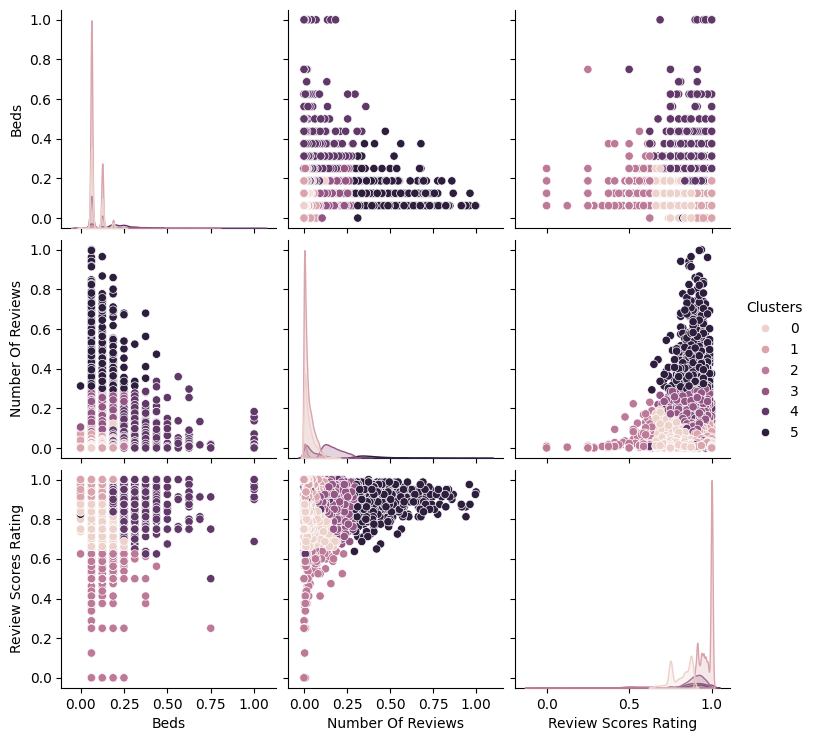

Price                                                            
            count        mean         std   min    25%    50%    75%      max
Clusters                                                                     
0          5542.0  131.727355  102.817083  20.0   75.0  110.5  169.0   5000.0
1         10529.0  152.287682  147.227153  10.0   85.0  130.0  190.0  10000.0
2           648.0  132.804012  213.088252  25.0   65.0   97.5  150.0   5000.0
3          3018.0  141.484758   83.971782  22.0   87.0  125.0  175.0   1000.0
4          1626.0  293.528905  262.934691  27.0  150.0  229.0  350.0   4500.0
5           792.0  133.224747   83.088608  27.0   80.0  110.0  167.5    875.0

In [57]:
### 4 ###

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=df, hue='Clusters')
plt.show()


In [58]:
### 5 ###

price_df['Clusters'] = df['Clusters']
price_df.loc[:,['Price', 'Clusters']].groupby('Clusters').describe()
# cluster 1 has the highest maximum rental price
# cluster 4 has the highest mean rental price as well as higher quartiles in the 25th and 50th and 75th percentile

Price                                                            
            count        mean         std   min    25%    50%    75%      max
Clusters                                                                     
0          5542.0  131.727355  102.817083  20.0   75.0  110.5  169.0   5000.0
1         10529.0  152.287682  147.227153  10.0   85.0  130.0  190.0  10000.0
2           648.0  132.804012  213.088252  25.0   65.0   97.5  150.0   5000.0
3          3018.0  141.484758   83.971782  22.0   87.0  125.0  175.0   1000.0
4          1626.0  293.528905  262.934691  27.0  150.0  229.0  350.0   4500.0
5           792.0  133.224747   83.088608  27.0   80.0  110.0  167.5    875.0

In [ ]:
### 6 ###

k_bar = 50
SSE = np.zeros(k_bar+1)
k_grid = np.arange(1,k_bar)

for k in range(k_bar):
  k += 1
  model = KMeans(n_clusters=k, max_iter=50, n_init = 5, random_state=0)
  model = model.fit(df)
  SSE[k] = model.inertia_

best_SSE = np.min(SSE)
min_index = np.where(SSE == best_SSE)
best_k = k_grid[min_index]

### From solutions for printing
plt.plot(np.arange(0,k_bar+1),SSE)
plt.xlabel("k")
plt.title('best k = '+str(best_k)+' with an SSE = '+str(best_SSE))
plt.ylabel('SSE')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/multiarray.py", line 346, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?